In [1]:
import pandas as pd
# import pickle5 as pickle
import importlib
import math
import matplotlib.pyplot as plt
import re
from rouge import Rouge

In [2]:
import dsci_2022
from dsci_2022.utils import *

In [3]:
# with open("../data/labels.pkl", "rb") as file:
#     labels = pickle.load(file)
    
# show(labels)

In [4]:
labels = pd.read_pickle("../data/labels.pkl")
show(labels)

(372564, 5)


,paper_id,sentence,text,sentence_score,in_summary
0,0,0,Proceedings of the 56th Annual Meeting of the ...,NaN,False
1,0,1,Parsing has been useful for incorporating ling...,NaN,False
2,0,2,Neural network-based approaches relying on den...,NaN,False
3,0,3,"Generally speaking, either these approaches pr...",NaN,False
4,0,4,Corresponding authors: yikang.shen@umontreal.c...,NaN,False


In [5]:
example_raw = labels.query("paper_id == 0")\
.sort_values("sentence")\
.text.map(lambda x: re.sub(r"\s", " ", x) + " ").sum()
print(example_raw)

Proceedings of the 56th Annual Meeting of the Association for Computational Linguistics (Long Papers), pages 1171–1180 Melbourne, Australia, July 15 - 20, 2018. c©2018 Association for Computational Linguistics 1171 Devising fast and accurate constituency parsing algorithms is an important, long-standing problem in natural language processing. Parsing has been useful for incorporating linguistic prior in several related tasks, such as relation extraction, paraphrase detection (Callison-Burch, 2008), and more recently, natural language inference (Bowman et al., 2016) and machine translation (Eriguchi et al., 2017). Neural network-based approaches relying on dense input representations have recently achieved competitive results for constituency parsing (Vinyals et al., 2015; Cross and Huang, 2016; Liu and Zhang, 2017b; Stern et al., 2017a). Generally speaking, either these approaches produce the parse tree sequentially, by governing ∗Equal contribution. Corresponding authors: yikang.shen@

3635


[('Proceedings', 0.5),
 ('of', 0.5086421904134987),
 ('the', 0.5172817987813012),
 ('56th', 0.5259162438291546),
 ('Annual', 0.534542945825462),
 ('Meeting', 0.5431593273520349),
 ('of', 0.5517628140741532),
 ('the', 0.5603508355097054),
 ('Association', 0.5689208257971765),
 ('for', 0.5774702244622562)]

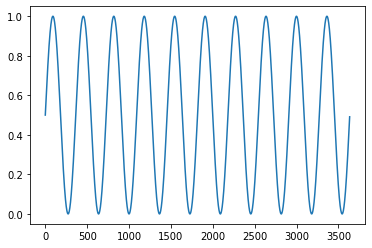

In [6]:
example = [
    (w, 0.5 + math.sin(10 * 2 * math.pi * i / len(example_raw.split(" "))) / 2) 
    for i, w in enumerate(example_raw.split(" "))
]
print(len(example))
plt.plot([s for w, s in example])
example[:10]

In [7]:
importlib.reload(dsci_2022.utils)
spans = dsci_2022.utils.extract_spans(example, 0.8)
print([len(l) for l in spans])
spans[0][:10]

[108, 109, 108, 109, 108, 109, 108, 109, 108, 109]


[('important,', 0.805308384784835),
 ('long-standing', 0.8121067532766586),
 ('problem', 0.8188118729669054),
 ('in', 0.8254217405526382),
 ('natural', 0.8319343811895946),
 ('language', 0.8383478490822156),
 ('processing.', 0.8446602280649946),
 ('Parsing', 0.8508696321749751),
 ('has', 0.8569742062152228),
 ('been', 0.8629721263091079)]

In [8]:
importlib.reload(dsci_2022.utils)
summary = dsci_2022.utils.produce_summary(
    spans, 
    summary_separator = "\n\n"
#     summary_separator = "\n---\n"
)
print(summary)

important, long-standing problem in natural language processing. Parsing has been useful for incorporating linguistic prior in several related tasks, such as relation extraction, paraphrase detection (Callison-Burch, 2008), and more recently, natural language inference (Bowman et al., 2016) and machine translation (Eriguchi et al., 2017). Neural network-based approaches relying on dense input representations have recently achieved competitive results for constituency parsing (Vinyals et al., 2015; Cross and Huang, 2016; Liu and Zhang, 2017b; Stern et al., 2017a). Generally speaking, either these approaches produce the parse tree sequentially, by governing ∗Equal contribution. Corresponding authors: yikang.shen@umontreal.ca, zhouhan.lin@umontreal.ca. †Work done while at Microsoft Research, Montreal. the sequence of transitions in a transition-based

in case of a binary tree, there exists a oneto-one correspondence between the ordering and the tree. Therefore, our model is trained to rep

In [9]:
ref_1 = summary
hyp_1 = "\n\n".join(summary.split("\n\n")[:-1])
ref_2 = "\n\n".join(summary.split("\n\n")[1:])
hyp_2 = "\n\n".join(summary.split("\n\n")[1:-1])

refs = [ref_1, ref_2]
hyps = [hyp_1, hyp_2]

[len(s) for s in refs], [len(s) for s in hyps]

([6759, 5898], [6044, 5183])

In [10]:
rouge = Rouge()
scores = rouge.get_scores(hyps = hyps, refs = refs)
scores

[{'rouge-1': {'r': 0.9271402550091075, 'p': 1.0, 'f': 0.9621928116423076},
  'rouge-2': {'r': 0.9071428571428571, 'p': 1.0, 'f': 0.9513108564350743},
  'rouge-l': {'r': 0.9271402550091075, 'p': 1.0, 'f': 0.9621928116423076}},
 {'rouge-1': {'r': 0.9016393442622951, 'p': 1.0, 'f': 0.9482758570823425},
  'rouge-2': {'r': 0.8946772366930917, 'p': 1.0, 'f': 0.9444112323137172},
  'rouge-l': {'r': 0.9016393442622951, 'p': 1.0, 'f': 0.9482758570823425}}]

In [11]:
importlib.reload(dsci_2022)
importlib.reload(dsci_2022.metrics)

results = dsci_2022.metrics.compute_rouge(refs, hyps)
results

,example,metric,f-measure,precision,recall
0,0,rouge-1,0.962193,1.0,0.927140
1,0,rouge-2,0.951311,1.0,0.907143
2,0,rouge-l,0.962193,1.0,0.927140
3,1,rouge-1,0.948276,1.0,0.901639
4,1,rouge-2,0.944411,1.0,0.894677
5,1,rouge-l,0.948276,1.0,0.901639


In [13]:
results.groupby("metric").mean()

,example,f-measure,precision,recall
metric,,,,
rouge-1,0.5,0.955234,1.0,0.91439
rouge-2,0.5,0.947861,1.0,0.90091
rouge-l,0.5,0.955234,1.0,0.91439
